In [170]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy pandas matplotlib plotly seaborn sklearn

In [171]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# Inline/embedding visualization of created plot
%matplotlib inline

import seaborn
plt.style.use("seaborn")

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model

In [172]:
df_original = pd.read_csv( "datasets/covid-19-dataset.csv", encoding='latin-1' )
df_original.head()

# Now let's convert the data + time string columns into actual dates (we use 'coerce' because not all strings have a nice format)
df_original["date"] = pd.to_datetime( df_original["dateRep"], errors = 'coerce')
df_original = df_original.set_index(["date"])

df_clean=df_original.filter(["date","cases","deaths","countriesAndTerritories","popData2018"], axis=1)
df_clean

,cases,deaths,countriesAndTerritories,popData2018
date,,,,
2020-03-28,16,1,Afghanistan,37172386.0
2020-03-27,0,0,Afghanistan,37172386.0
2020-03-26,33,0,Afghanistan,37172386.0
2020-03-25,2,0,Afghanistan,37172386.0
2020-03-24,6,1,Afghanistan,37172386.0
...,...,...,...,...
2020-03-25,0,0,Zimbabwe,14439018.0
2020-03-24,0,1,Zimbabwe,14439018.0
2020-03-23,0,0,Zimbabwe,14439018.0


# Events by Country

In [173]:
cases_by_countries = df_clean.groupby(["countriesAndTerritories"]).sum().sort_values(by=["cases"], ascending=False)
cases_by_countries.head(10)
# cases_by_countries.describe()

,cases,deaths,popData2018
countriesAndTerritories,,,
United_States_of_America,104686,1707,2.911790e+10
Italy,86498,9136,5.378384e+09
China,82213,3301,1.239530e+11
Spain,64059,4858,4.158414e+09
Germany,48582,325,7.380585e+09
France,32964,1995,5.961865e+09
Iran,32332,2378,7.280224e+09
United_Kingdom,14543,759,5.917520e+09
Switzerland,12104,197,7.579723e+08


It looks like that the virus is especially lethal in Italy, despite

Text(0, 0.5, 'Countries')

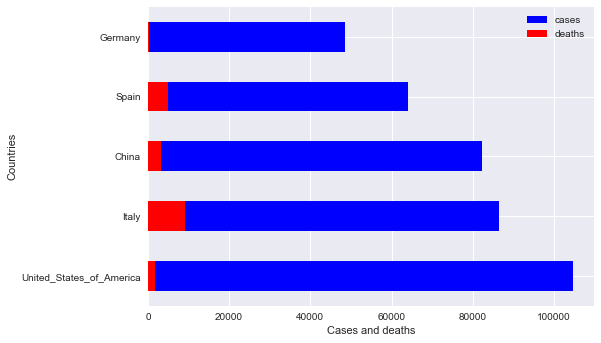

In [117]:
# See http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
ax = plt.gca()

data = cases_by_countries.sort_values(by=["cases","deaths"], ascending=False).head()

data.plot.barh( ax = ax,
    y ="cases",
    color='blue')
data.plot.barh( ax = ax,
    y ="deaths",
    color='red')
plt.xlabel( "Cases and deaths" )
plt.ylabel( "Countries" )

In [148]:
from datetime import date
today = date.today()

subset = df_clean.loc['2020-3-1':'2020-3-2']
subset

,cases,deaths,countriesAndTerritories,popData2018
date,,,,
2020-03-02,0,0,Afghanistan,37172386.0
2020-03-01,0,0,Afghanistan,37172386.0
2020-03-02,0,0,Algeria,42228429.0
2020-03-01,0,0,Algeria,42228429.0
2020-03-02,0,0,Armenia,2951776.0
...,...,...,...,...
2020-03-01,0,0,United_Kingdom,66488991.0
2020-03-02,3,0,United_States_of_America,327167434.0
2020-03-01,0,0,United_States_of_America,327167434.0


In [168]:
from datetime import date

from_date="2020-3-13"
to_date="2020-3-18"
today = date.today()

df_italy = df_clean.loc[from_date:to_date]
df_italy = df_italy[ df_italy["countriesAndTerritories"] == "Italy"]
df_italy

,cases,deaths,countriesAndTerritories,popData2018
date,,,,
2020-03-18,3526,347,Italy,60431283.0
2020-03-17,4000,347,Italy,60431283.0
2020-03-16,6230,370,Italy,60431283.0
2020-03-15,90,173,Italy,60431283.0
2020-03-14,2547,252,Italy,60431283.0
2020-03-13,2651,189,Italy,60431283.0


Text(0, 0.5, 'Countries')

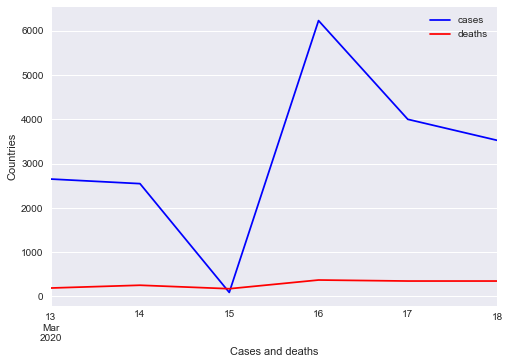

In [169]:
ax = plt.gca()
df_italy.plot( ax = ax,
    y ="cases",
    color='blue')
df_italy.plot( ax = ax,
    y ="deaths",
    color='red')
plt.xlabel( "Cases and deaths" )
plt.ylabel( "Countries" )